## **Quy trình làm AI mạng ANN**


*   data
*   model
*   compile
*   train
*   evaluate



In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# keras.datasets.cifar10.load_data

In [ ]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

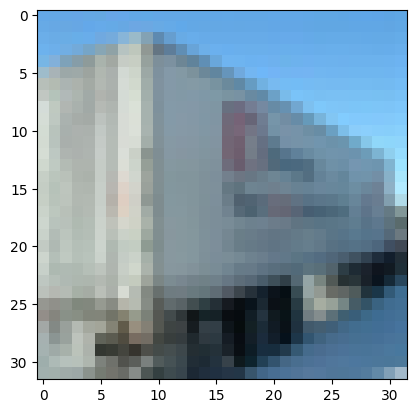

In [ ]:
digit = X_train[15]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
print('Mo hinh so : ',y_train[15])

Mo hinh so :  [9]


<ipython-input-39-93b9fca45055>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


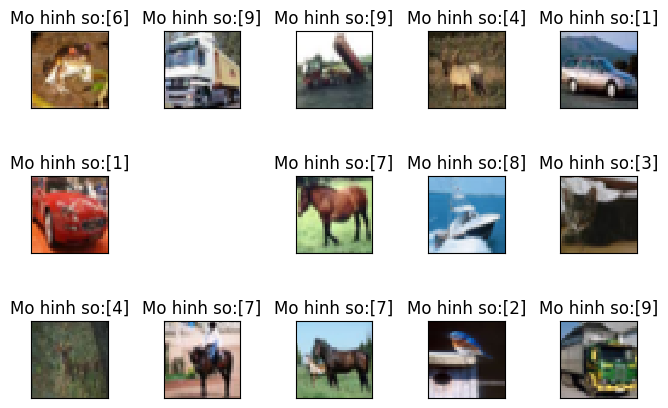

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i],cmap='gray',interpolation='none')
  plt.title('Mo hinh so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


## **ve mang**

In [ ]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
from keras.utils import to_categorical

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential()
# model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5000)              15365000  
                                                                 
 dense_37 (Dense)            (None, 3000)              15003000  
                                                                 
 dense_38 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_39 (Dense)            (None, 10)                10010     
                                                                 
Total params: 33,379,010
Trainable params: 33,379,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = X_train
y = y_train
# 
X_train = X_train.reshape(50000,32*32*3)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(10000,32*32*3)
X_test = X_test.astype('float32')/255
#
X_train.shape

(50000, 3072)

In [ ]:
y_train = to_categorical(y_train,10)  #1 to 10 bits
y_test = to_categorical(y_test,10)
y_train.shape
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
391/391 [==============================] - 6s 11ms/step - loss: 2.4265 - accuracy: 0.2469
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8171 - accuracy: 0.3464
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7242 - accuracy: 0.3821
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.6537 - accuracy: 0.4094
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 1.5923 - accuracy: 0.4320
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 1.5524 - accuracy: 0.4439
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 1.5096 - accuracy: 0.4630
Epoch 8/100
391/391 [==============================] - 4s 11ms/step - loss: 1.4777 - accuracy: 0.4751
Epoch 9/100
391/391 [==============================] - 4s 11ms/step - loss: 1.4454 - accuracy: 0.4835
Epoch 10/100
391/391 [==============================] - 4s 11ms/step - loss: 1.410

In [ ]:
test_loss,test_acc = model.evaluate(X_test,y_test)
model.save('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/ipython/mang/model_ANN_cifar10.h5')
print('Mat mat: ',test_loss)
print('Do chinh xac: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 11.0708 - accuracy: 0.4872
Mat mat:  11.070837020874023
Do chinh xac:  0.487199991941452


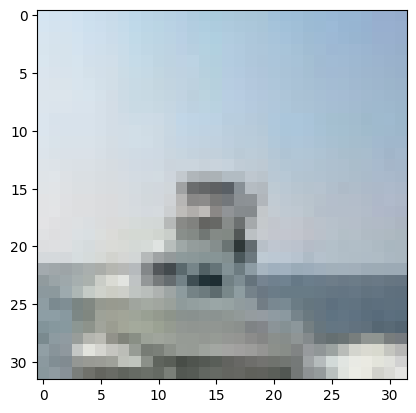

In [ ]:
digit = X[100]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
X_pred = X[555].reshape(1,32*32*3)
X_pred = X_pred.astype('float32')/255
y_pred = model.predict(X_pred)
print(y_pred)

1/1 [==============================] - 0s 87ms/step
[[1.0000000e+00 5.0985571e-34 4.0904077e-32 1.9585061e-19 0.0000000e+00
  1.0754190e-33 0.0000000e+00 0.0000000e+00 1.9221941e-26 2.8182648e-15]]


In [ ]:
# 9.9981e-01 lon nhat - dem thay o vi tri so 4

In [ ]:
# digit = X[555]
# plt.imshow(digit, cmap=plt.cm.binary)
# plt.show()

In [ ]:
# np.argmax(model.predict(X_pred),axis=1)

**model.save('test1.h5')**

**open**

**model10 = load('test1.h5')**

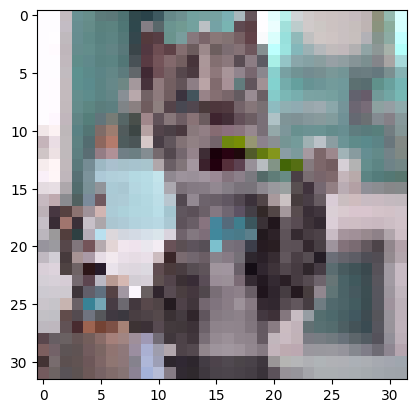

In [ ]:
from keras.utils import load_img
img = load_img('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/images/meo4.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import img_to_array


img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 19ms/step


array([3])

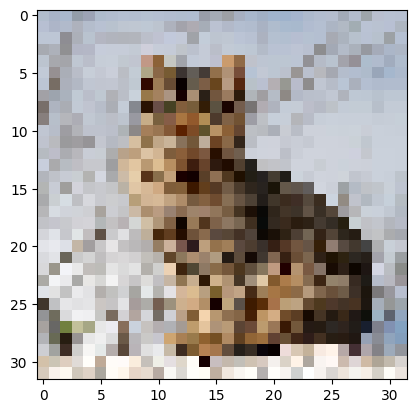

In [ ]:
from keras.utils import load_img
img = load_img('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/images/meo2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import img_to_array


img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 17ms/step


array([2])